In [1]:
import pandas as pd
df = pd.read_csv('user_visit_duration.csv')

In [2]:
df.head()

,Time (min),Buy
0,2.000000,0
1,0.683333,0
2,3.216667,1
3,0.900000,0
4,1.533333,1


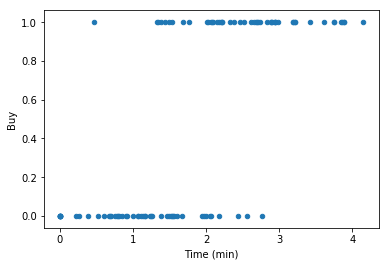

In [4]:
df.plot(kind='scatter', x='Time (min)', y='Buy')

In [5]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, SGD

Using TensorFlow backend.


In [6]:
model = Sequential()
model.add(Dense(1, input_shape=(1,), activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


In [7]:
model.compile(SGD(lr=0.5), 'binary_crossentropy', metrics=['accuracy'])

In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [9]:
X = df[['Time (min)']].values
y = df['Buy'].values


In [10]:

model.fit(X, y, epochs=25)

Instructions for updating:
Use tf.cast instead.
Epoch 1/25
100/100 [==============================] - 1s 8ms/step - loss: 1.1702 - acc: 0.4300
Epoch 2/25
100/100 [==============================] - 0s 170us/step - loss: 0.6859 - acc: 0.5000
Epoch 3/25
100/100 [==============================] - 0s 251us/step - loss: 0.6132 - acc: 0.5900
Epoch 4/25
100/100 [==============================] - 0s 122us/step - loss: 0.5756 - acc: 0.6400
Epoch 5/25
100/100 [==============================] - 0s 135us/step - loss: 0.5522 - acc: 0.7000
Epoch 6/25
100/100 [==============================] - 0s 127us/step - loss: 0.5229 - acc: 0.8000
Epoch 7/25
100/100 [==============================] - 0s 297us/step - loss: 0.5147 - acc: 0.7500
Epoch 8/25
100/100 [==============================] - 0s 310us/step - loss: 0.4917 - acc: 0.7800
Epoch 9/25
100/100 [==============================] - 0s 395us/step - loss: 0.4838 - acc: 0.7900
Epoch 10/25
100/100 [==============================] - 0s 268us/step - loss: 0.47

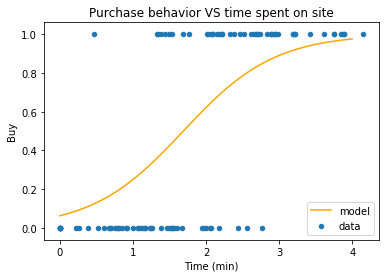

In [11]:
import matplotlib.pyplot as plt
import numpy as np 

ax = df.plot(kind='scatter', x='Time (min)', y='Buy',
             title='Purchase behavior VS time spent on site')

temp = np.linspace(0, 4)
ax.plot(temp, model.predict(temp), color='orange')
plt.legend(['model', 'data'])

In [12]:
temp_class = model.predict(temp) > 0.5

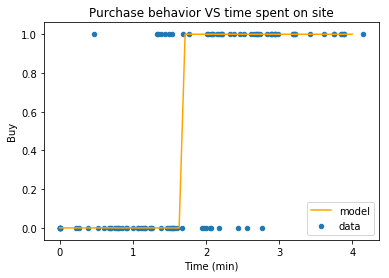

In [13]:
ax = df.plot(kind='scatter', x='Time (min)', y='Buy',
             title='Purchase behavior VS time spent on site')

temp = np.linspace(0, 4)
ax.plot(temp, temp_class, color='orange')
plt.legend(['model', 'data'])

In [14]:
y_pred = model.predict(X)
y_class_pred = y_pred > 0.5

In [15]:
from sklearn.metrics import accuracy_score

In [16]:
print("The accuracy score is {:0.3f}".format(accuracy_score(y, y_class_pred)))

The accuracy score is 0.830


In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [19]:
params = model.get_weights()
params = [np.zeros(w.shape) for w in params]
model.set_weights(params)

In [20]:
print("The accuracy score is {:0.3f}".format(accuracy_score(y, model.predict(X) > 0.5)))

The accuracy score is 0.500


In [21]:
model.fit(X_train, y_train, epochs=25, verbose=0)

In [22]:
print("The train accuracy score is {:0.3f}".format(accuracy_score(y_train, model.predict(X_train) > 0.5)))
print("The test accuracy score is {:0.3f}".format(accuracy_score(y_test, model.predict(X_test) > 0.5)))

The train accuracy score is 0.838
The test accuracy score is 0.800


In [22]:
from sklearn.metrics import confusion_matrix

In [23]:
confusion_matrix(y, y_class_pred)

array([[40, 10],
       [ 7, 43]])

In [24]:
def pretty_confusion_matrix(y_true, y_pred, labels=["False", "True"]):
    cm = confusion_matrix(y_true, y_pred)
    pred_labels = ['Predicted '+ l for l in labels]
    df = pd.DataFrame(cm, index=labels, columns=pred_labels)
    return df

In [25]:
pretty_confusion_matrix(y, y_class_pred, ['Not Buy', 'Buy'])

,Predicted Not Buy,Predicted Buy
Not Buy,40,10
Buy,7,43


In [26]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [27]:
print("Precision:\t{:0.3f}".format(precision_score(y, y_class_pred)))
print("Recall:  \t{:0.3f}".format(recall_score(y, y_class_pred)))
print("F1 Score:\t{:0.3f}".format(f1_score(y, y_class_pred)))

Precision:	0.811
Recall:  	0.860
F1 Score:	0.835


In [28]:
from sklearn.metrics import classification_report

In [29]:
print(classification_report(y, y_class_pred))

              precision    recall  f1-score   support

           0       0.85      0.80      0.82        50
           1       0.81      0.86      0.83        50

   micro avg       0.83      0.83      0.83       100
   macro avg       0.83      0.83      0.83       100
weighted avg       0.83      0.83      0.83       100



In [30]:
df = pd.read_csv('weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [31]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [32]:
pd.get_dummies(df['Gender'], prefix='Gender').head()

,Gender_Female,Gender_Male
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


# Feature Transformations

In [33]:
# 1) Rescale with fixed factor
df['Height (feet)'] = df['Height']/12.0
df['Weight (100 lbs)'] = df['Weight']/100.0

In [34]:
df.describe().round(2)

,Height,Weight,Height (feet),Weight (100 lbs)
count,10000.00,10000.00,10000.00,10000.00
mean,66.37,161.44,5.53,1.61
std,3.85,32.11,0.32,0.32
min,54.26,64.70,4.52,0.65
25%,63.51,135.82,5.29,1.36
50%,66.32,161.21,5.53,1.61
75%,69.17,187.17,5.76,1.87
max,79.00,269.99,6.58,2.70


In [35]:
# MinMax normalization
# where value between 0 to 1
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
df['Weight_mms'] = mms.fit_transform(df[['Weight']])
df['Height_mms'] = mms.fit_transform(df[['Height']])
df.describe().round(2)

,Height,Weight,Height (feet),Weight (100 lbs),Weight_mms,Height_mms
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,66.37,161.44,5.53,1.61,0.47,0.49
std,3.85,32.11,0.32,0.32,0.16,0.16
min,54.26,64.70,4.52,0.65,0.00,0.00
25%,63.51,135.82,5.29,1.36,0.35,0.37
50%,66.32,161.21,5.53,1.61,0.47,0.49
75%,69.17,187.17,5.76,1.87,0.60,0.60
max,79.00,269.99,6.58,2.70,1.00,1.00


In [36]:
# 3) Standard normalization
# where mean is zero and std is 1

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
df['Weight_ss'] = ss.fit_transform(df[['Weight']])
df['Height_ss'] = ss.fit_transform(df[['Height']])
df.describe().round(2)

,Height,Weight,Height (feet),Weight (100 lbs),Weight_mms,Height_mms,Weight_ss,Height_ss
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,66.37,161.44,5.53,1.61,0.47,0.49,0.00,0.00
std,3.85,32.11,0.32,0.32,0.16,0.16,1.00,1.00
min,54.26,64.70,4.52,0.65,0.00,0.00,-3.01,-3.15
25%,63.51,135.82,5.29,1.36,0.35,0.37,-0.80,-0.74
50%,66.32,161.21,5.53,1.61,0.47,0.49,-0.01,-0.01
75%,69.17,187.17,5.76,1.87,0.60,0.60,0.80,0.73
max,79.00,269.99,6.58,2.70,1.00,1.00,3.38,3.28


In [37]:
import matplotlib.pyplot as plt

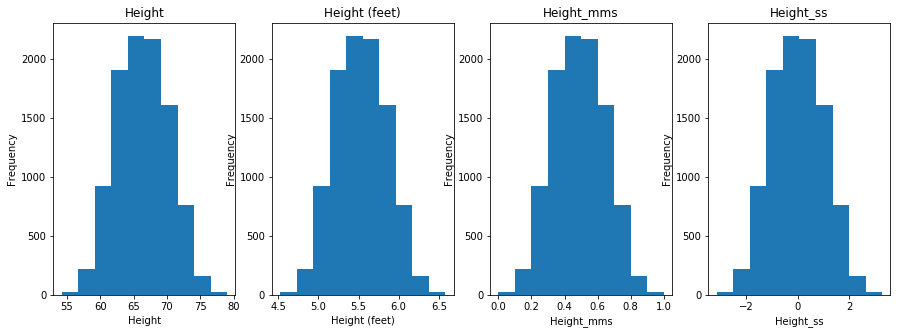

In [38]:
plt.figure(figsize=(15, 5))

for i, feature in enumerate(['Height', 'Height (feet)', 'Height_mms', 'Height_ss']):
    plt.subplot(1, 4, i+1)
    df[feature].plot(kind='hist', title=feature)
    plt.xlabel(feature)